### Importando las librerias

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

### Importando los datasets

In [2]:
df_train_values = pd.read_csv('../datasets/train_values.csv')
df_train_labels = pd.read_csv('../datasets/train_labels.csv')

### Daños por antiguedad

#### Hago el filtro de los datos

In [3]:
df_train_values_filtered = df_train_values.loc[:, ['building_id', 'age']]

#### Calculo la cantidad de edificios por antiguedad

In [4]:
df_buildings_by_age = df_train_values_filtered\
    .groupby(['age'])\
    .count()\
    .reset_index()\
    .rename(columns={'building_id':'total_buildings_by_age'})
total_buildings_by_age = df_buildings_by_age[['total_buildings_by_age', 'age']]

#### Hago el merge de los datos

In [5]:
df_ages_and_damage = df_train_labels.merge(df_train_values_filtered).merge(df_buildings_by_age)

#### Hago el calculo de los porcentajes de cantidad de edificios por daño y antiguedad

In [6]:
df_ages_and_damage_with_percentage = df_ages_and_damage\
    .groupby(['age', 'damage_grade', 'total_buildings_by_age'])\
    .count()\
    .rename(columns = { 'building_id': 'total_buildings_by_age_and_damage' })\
    .reset_index()
df_ages_and_damage_with_percentage['percentage'] = (df_ages_and_damage_with_percentage['total_buildings_by_age_and_damage'] * 100) / df_ages_and_damage_with_percentage['total_buildings_by_age']
df_ages_and_damage_with_percentage.iloc[0:2]

,age,damage_grade,total_buildings_by_age,total_buildings_by_age_and_damage,percentage
0,0,1,26041,7213,27.70
1,0,2,26041,12721,48.85


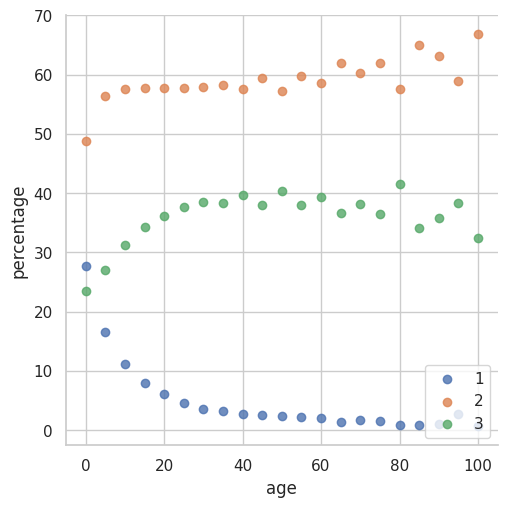

In [7]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

df_ages_and_damage_with_percentage_filtered = df_ages_and_damage_with_percentage.loc[df_ages_and_damage_with_percentage['age'] <= 100, :]
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="age", y="percentage", data=df_ages_and_damage_with_percentage_filtered, fit_reg=False, hue='damage_grade', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

El análisis puede tener o bien sesgo o bien poco peso por falta de datos. Pero puede verse como al ser mas cantidad de edificios de daño nivel 2, los porcentajes siempre son mas elevados. Utilizando el gráfico y la tabla que está debajo, podemos ver que los edificios de daños nivel 1 disminuyen con muestras de la misma cantidad. Esto puede tener que ver con la calidad de la construcción o de los materiales mas robustos. 

Pero es un dato relevante a seguir investigando. Por otra parte, se puede ver como los edificios de nivel 2 y 3 aumentan a medida que pasa el tiempo, apoyándose en que cada vez son menos edificios con daños de nivel 1. Luego se estabiliza en el tiempo hasta tener una divergencia, que imaginamos, se debe a la falta de datos. 

### Datños por land_surface_condition

In [ ]:
df_train_values['land_surface_condition'].value_counts()